# Notebook to compare across space and well-mixed, O and F

In [62]:
# import of necessary files from other folders

import os
import sys
import ast

# libraries imports

import importlib
import numpy as np
import matplotlib.pyplot as plt
import tempfile
import seaborn as sns
import pandas as pd
import pickle

from IPython.display import Image, display
from PIL import Image
from pathlib import Path
from scipy.integrate import solve_ivp
from matplotlib.colors import LinearSegmentedColormap,TwoSlopeNorm

# Set default figure and axes background color to white
plt.rcParams['figure.facecolor'] = 'white'  # Background for the entire figure
plt.rcParams['axes.facecolor'] = 'white' 

# Function to check if a string can be converted to a float or an integer
def is_number(value):
    try:
        float(value)
        return True
    except ValueError:
        return False

## Import from all datasets

In [63]:
wm_df = pd.read_pickle(Path('path to aux.pkl'))
print(len(wm_df))
wm_df.head(1)

547


,n_consumed,n_produced,leakage,PCS_bias,PCS_var,replica,C_F,C_O,D_F,D_O,...,g0_F,A_f,g0_O,A_O,richness_F,richness_O,collapse_F,collapse_O,shannon_F,shannon_O
0,1,1,0.2,1.0,0.1,100,"([[0.8250234526945303, 0.899242270332405, 0.0,...","([[0.8250234526945303, 1.0, 0.0, 0.0, 0.0, 0.0...","([[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","([[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",...,"([31.53798728170867, 39.53673340484759, 42.634...","([[-0.005832422312122297, -0.00731164306969627...","([3.4551980181297886, 3.455196700458753, 3.455...","[[-0.013882183056643106, -0.006787220567049379...",1,7,no,no,0.000003,1.699293


In [81]:
df_space_O= pd.read_pickle('path to df_O_sr or lr etc')

546

In [ ]:
df_space_F= pd.read_pickle('path to df_F_sr or lr etc')

## Merge dataframes

In [85]:
# First, merge wm_df with df_space_F on the common columns
merged_df = pd.merge(wm_df, df_space_F, on=['leakage', 'n_consumed', 'n_produced','replica'], how='outer')
final_merged_df = pd.merge(merged_df, df_space_O, on=['leakage', 'n_consumed', 'n_produced','replica'], how='outer')

# Display the number of rows in the final merged dataframe and the first row
print(len(final_merged_df))
final_merged_df.head(1)

547


,n_consumed,n_produced,leakage,PCS_bias,PCS_var,replica,C_F_x,C_O_x,D_F_x,D_O_x,...,R_sp_O,grid_sp_O,N_sp_O,sh_sp_O,C_O_y,D_O_y,spec_y,CR_R_O_y,CR_N_O_y,t_list_O
0,1,1,0.2,1.0,0.1,5,"([[1.044122748688504, 0.0, 0.0, 0.0, 0.0, 0.0,...","([[1.044122748688504, 0.0, 0.0, 0.0, 0.0, 0.0,...","([[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","([[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",...,"[[[0.009238033028057825, 0.001075908469896016,...","[[[0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1,...","[[0.122, 0.1183, 0.1239, 0.1251, 0.1299, 0.125...","[2.0790421505389913, 1.939336028004116, 1.9374...","[[1.044122748688504, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([[10000.0, 10000.0, 10000.0, 10000.0, 10000.0...","([[1.0446709833124508, 0.8931513554923691, 0.9...","[0, 0, 0.158040485604848, 37.95203364179555, 3..."


In [86]:
df_weird = final_merged_df[(final_merged_df['R_sp_F'].apply(lambda x: np.any(x<0)))|(final_merged_df['R_sp_F'].apply(lambda x: np.any(x<0)))]
len(df_weird)

31

In [87]:
final_merged_df = final_merged_df.loc[~final_merged_df.index.isin(df_weird.index)]
len(final_merged_df)

516

## Time distributions for space

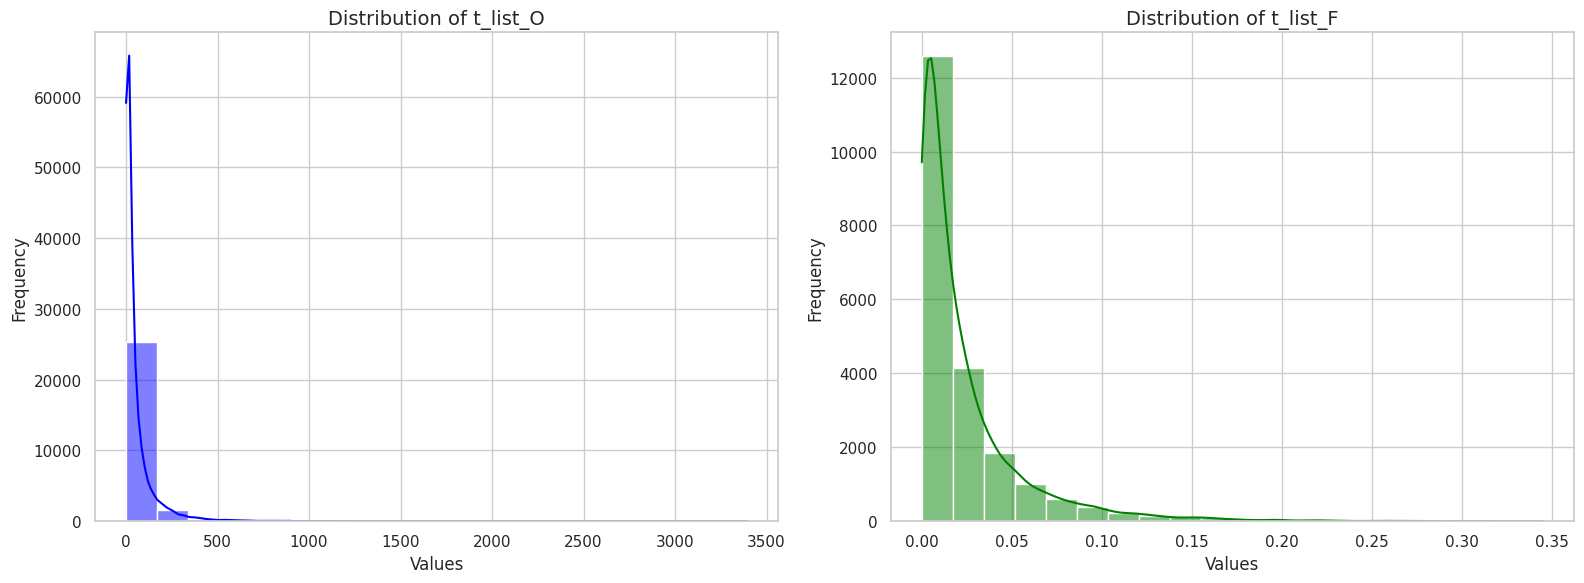

In [88]:
import seaborn as sns
from itertools import chain

# Extract all values from the columns
t_list_F_values = list(chain.from_iterable(df_space_F['t_list_F']))
t_list_O_values = list(chain.from_iterable(df_space_O['t_list_O']))

# Set the style and color palette
sns.set(style="whitegrid")

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot the distribution of t_list_O
sns.histplot(t_list_O_values, bins=20, color='blue', kde=True, ax=axs[0])
axs[0].set_title('Distribution of t_list_O', fontsize=14)
axs[0].set_xlabel('Values', fontsize=12)
axs[0].set_ylabel('Frequency', fontsize=12)

# Plot the distribution of t_list_F
sns.histplot(t_list_F_values, bins=20, color='green', kde=True, ax=axs[1])
axs[1].set_title('Distribution of t_list_F', fontsize=14)
axs[1].set_xlabel('Values', fontsize=12)
axs[1].set_ylabel('Frequency', fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## compare diversity for O and F

In [100]:
final_merged_df['shannon_sp_O'] = final_merged_df['sh_sp_O'].apply(lambda x: x[-1] if isinstance(x, list) and len(x) > 0 else np.nan)
final_merged_df['shannon_sp_F'] = final_merged_df['sh_sp_F'].apply(lambda x: x[-1] if isinstance(x, list) and len(x) > 0 else np.nan)

## T tests comparisons

In [109]:
from scipy.stats import ttest_rel
from statsmodels.stats.multitest import multipletests

final_merged_df = final_merged_df.dropna(subset=['shannon_F', 'shannon_O', 'shannon_sp_F', 'shannon_sp_O'])


# Assuming final_merged_df is your DataFrame
diversity_wm_F = final_merged_df['shannon_F']
diversity_wm_O = final_merged_df['shannon_O']
diversity_sp_F = final_merged_df['shannon_sp_F']
diversity_sp_O = final_merged_df['shannon_sp_O']

# Perform paired t-tests
t_statistic_wm, p_value_wm = ttest_rel(diversity_wm_F, diversity_wm_O)  # wm_F vs wm_O
t_statistic_sp, p_value_sp = ttest_rel(diversity_sp_F, diversity_sp_O)  # sp_F vs sp_O
t_statistic_F, p_value_F = ttest_rel(diversity_wm_F, diversity_sp_F)    # wm_F vs sp_F
t_statistic_O, p_value_O = ttest_rel(diversity_wm_O, diversity_sp_O)    # wm_O vs sp_O

# Store p-values in a list
p_values = [p_value_wm, p_value_sp, p_value_F, p_value_O]

# Correct for multiple testing using Bonferroni or FDR
corrected_p_values = multipletests(p_values, method='bonferroni')[1]  # Use 'fdr_bh' for FDR

# Print results
print("Original p-values:", p_values)
print("Corrected p-values (Bonferroni):", corrected_p_values)

# Interpret results
alpha = 0.05  # Significance level
for i, p in enumerate(corrected_p_values):
    if p < alpha:
        print(f"Test {i+1}: Significant (p = {p:.4f})")
    else:
        print(f"Test {i+1}: Not significant (p = {p:.4f})")

Original p-values: [np.float64(2.2334968507059135e-27), np.float64(4.328385568754653e-25), np.float64(9.405223888432148e-76), np.float64(4.963336983887882e-123)]
Corrected p-values (Bonferroni): [8.93398740e-027 1.73135423e-024 3.76208956e-075 1.98533479e-122]
Test 1: Significant (p = 0.0000)
Test 2: Significant (p = 0.0000)
Test 3: Significant (p = 0.0000)
Test 4: Significant (p = 0.0000)


## ANOVA within groups

In [111]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Assuming final_merged_df is your DataFrame
# Ensure your DataFrame has the necessary columns: 'shannon_F', 'shannon_O', 'shannon_sp_F', 'shannon_sp_O', 'leakage', 'n_consumed', and 'n_produced'

# Define the diversity measures
diversity_measures = ['shannon_F', 'shannon_O', 'shannon_sp_F', 'shannon_sp_O']

# Initialize a dictionary to store the ANOVA results
anova_results_dict = {}

# Perform three-way ANOVA for each diversity measure and store the results
for diversity in diversity_measures:
    model = ols(f'{diversity} ~ C(leakage) * C(n_consumed) * C(n_produced)', data=final_merged_df).fit()
    anova_results = anova_lm(model, typ=2)
    anova_results_dict[diversity] = anova_results

# Write results to a text file
with open('anova_results.txt', 'w') as file:
    for diversity, results in anova_results_dict.items():
        file.write(f'ANOVA results for {diversity}:\n')
        file.write(results.to_string())
        file.write('\n\n')

/users/fsibilla/env_MES/lib64/python3.9/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 3
  warnings.warn('covariance of constraints does not have full '


/users/fsibilla/env_MES/lib64/python3.9/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 3
  warnings.warn('covariance of constraints does not have full '
/users/fsibilla/env_MES/lib64/python3.9/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 3
  warnings.warn('covariance of constraints does not have full '
/users/fsibilla/env_MES/lib64/python3.9/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 3
  warnings.warn('covariance of constraints does not have full '
